In [1]:
import numpy as np
import pandas as pd

In [2]:
from tqdm.notebook import tqdm
tqdm.pandas()

In [3]:
df = pd.read_csv("emotion-text-dataset/emotion_dataset.csv")
df

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...,...,...
34787,34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,34788,joy,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,34789,anger,A man robbed me today .,man robbed today
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


In [4]:
# drop "shame" to uniform the labels
df = df[df["Emotion"] != "shame"]

In [5]:
df["Emotion"].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
Name: Emotion, dtype: int64

In [6]:
# making the labeling same as the speech
emotion_to_id_convert = {
    "surprise": 0,
    "neutral": 1,
    "joy": 2,
    "sadness": 3,
    "anger": 4,
    "fear": 5,
    "disgust": 6
}

emotions_dict = {
    0: 'surprised',
    1: 'neutral',
    2: 'happy',
    3: 'sad',
    4: 'angry',
    5: 'fearful',
    6: 'disgust'
}

In [7]:
df["Emotion_uniform"] = df["Emotion"].apply(lambda x: emotion_to_id_convert[x])
df.head()

/var/folders/d_/43yhfw3n2wx5mg7dg0cxjld00000gn/T/ipykernel_70458/4020174303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Emotion_uniform"] = df["Emotion"].apply(lambda x: emotion_to_id_convert[x])


,Unnamed: 0,Emotion,Text,Clean_Text,Emotion_uniform
0,0,neutral,Why ?,NaN,1
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow,2
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...,3
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...,2
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...,2


In [8]:
df[df["Emotion_uniform"] == 0].sample()["Text"].iloc[0]

'klaar nu alleen nog #gedicht. t Is best mooi geworden.. Nu nog een dagje wachten...'

In [10]:
df.drop(["Unnamed: 0", "Clean_Text", "Emotion"], axis=1, inplace=True)

/var/folders/d_/43yhfw3n2wx5mg7dg0cxjld00000gn/T/ipykernel_70458/3318117705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["Unnamed: 0", "Clean_Text", "Emotion"], axis=1, inplace=True)


In [11]:
df

,Text,Emotion_uniform
0,Why ?,1
1,Sage Act upgrade on my to do list for tommorow.,2
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,3
3,Such an eye ! The true hazel eye-and so brill...,2
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,2
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,0
34788,The world didnt give it to me..so the world MO...,2
34789,A man robbed me today .,4
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",5


Doing text cleaning on our own

In [12]:
import nltk
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer

stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
detokenizer = TreebankWordDetokenizer()

In [13]:
def clean_text(text):
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = word_tokenize(text)
    # remove stopwords
    text = [token for token in text if token not in stop_words]
    # lemmatizer
    text = [lemmatizer.lemmatize(token) for token in text]

    # return detokenizer.detokenize(text).strip()
    return text

In [14]:
df["Clean_Text"] = df["Text"].progress_apply(clean_text)

  0%|          | 0/34646 [00:00<?, ?it/s]

/var/folders/d_/43yhfw3n2wx5mg7dg0cxjld00000gn/T/ipykernel_70458/1937477319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Clean_Text"] = df["Text"].progress_apply(clean_text)


Remove text that are too short

In [18]:
df.shape

(34646, 3)

In [17]:
df[df["Clean_Text"].apply(len) > 3].shape

(31707, 3)

In [19]:
df = df[df["Clean_Text"].apply(len) > 3]

In [20]:
df["Clean_Text_detok"] = df["Clean_Text"].progress_apply(lambda x: detokenizer.detokenize(x).strip())

  0%|          | 0/31707 [00:00<?, ?it/s]

/var/folders/d_/43yhfw3n2wx5mg7dg0cxjld00000gn/T/ipykernel_70458/3863383790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Clean_Text_detok"] = df["Clean_Text"].progress_apply(lambda x: detokenizer.detokenize(x).strip())


In [21]:
df.head()

,Text,Emotion_uniform,Clean_Text,Clean_Text_detok
1,Sage Act upgrade on my to do list for tommorow.,2,"[Sage, Act, upgrade, list, tommorow]",Sage Act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,3,"[ON, THE, WAY, TO, MY, HOMEGIRL, BABY, FUNERAL...",ON THE WAY TO MY HOMEGIRL BABY FUNERAL MAN I H...
3,Such an eye ! The true hazel eye-and so brill...,2,"[Such, eye, The, true, hazel, eyeand, brillian...",Such eye The true hazel eyeand brilliant Regul...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,2,"[Iluvmiasantos, ugh, babe, hugggzzz, u, babe, ...",Iluvmiasantos ugh babe hugggzzz u babe naamaze...
5,I'm expecting an extremely important phonecall...,5,"[Im, expecting, extremely, important, phonecal...",Im expecting extremely important phonecall min...


# Map Text to Embedding Dimension

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(lowercase=True, ngram_range=(1, 3), max_df=0.95, min_df=5)

In [23]:
y = df["Emotion_uniform"]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# note that sometimes using "Text" instead of "Clean_Text" column yields better result

In [26]:
X_lin_train, X_lin_val, y_lin_train, y_lin_val = train_test_split(df["Clean_Text_detok"], y, random_state=3407, test_size=0.2, stratify=y)

In [27]:
X_lin_train = vectorizer.fit_transform(X_lin_train)
X_lin_val = vectorizer.transform(X_lin_val)

In [28]:
# import tensorflow_hub as hub

# module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
# use_model = hub.load(module_url)
# X_train = use_model(X_train).numpy()
# X_val = use_model(X_val).numpy()

In [29]:
X_lin_train.shape

(25365, 8301)

Check if y label is distributed correctly

In [30]:
y_lin_train.value_counts().sort_index()

0    3210
1     514
2    8398
3    5122
4    3239
5    4203
6     679
Name: Emotion_uniform, dtype: int64

Try SMOTE

In [31]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=3407)

In [32]:
X_lin_train, y_lin_train = smote.fit_resample(X_lin_train, y_lin_train)

In [33]:
y_lin_train.value_counts().sort_index()

0    8398
1    8398
2    8398
3    8398
4    8398
5    8398
6    8398
Name: Emotion_uniform, dtype: int64

In [34]:
y_lin_val.value_counts().sort_index()

0     803
1     128
2    2100
3    1281
4     810
5    1051
6     169
Name: Emotion_uniform, dtype: int64

In [35]:
import torch
from torch.utils.data import Dataset, DataLoader

In [36]:
from utils import torch_device_seed, check_gpu, clear_device_cache

In [37]:
np.random.seed(3407)
torch.manual_seed(3407)
torch_device_seed(3407)

In [38]:
y_lin_val.to_numpy()

array([4, 2, 5, ..., 0, 2, 4])

# Modelling

In [39]:
import gc
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [40]:
device = check_gpu()

In [41]:
device

device(type='mps')

## Non-NN Models

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

In [43]:
logreg = LogisticRegression(multi_class='ovr', random_state=3407)

logreg.fit(X_lin_train, y_lin_train)

LogisticRegression(multi_class='ovr', random_state=3407)

In [44]:
logreg = LogisticRegression(
    C=3.2084436981919744,
    max_iter=1548,
    tol=1.0993608291010027e-05,
    multi_class='ovr',
    solver='lbfgs',
    random_state=3407
)

logreg.fit(X_lin_train, y_lin_train)

LogisticRegression(C=3.2084436981919744, max_iter=1548, multi_class='ovr',
                   random_state=3407, tol=1.0993608291010027e-05)

In [45]:
# ranfor = RandomForestClassifier(n_estimators=450, random_state=3407)

# ranfor.fit(X_lin_train, y_lin_train)

RandomForestClassifier(n_estimators=450, random_state=3407)

In [46]:
xgb = XGBClassifier()

xgb.fit(X_lin_train, y_lin_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [60]:
# y_lin_pred = logreg.predict(X_lin_val)
# y_lin_pred = ranfor.predict(X_lin_val)
y_lin_pred = xgb.predict(X_lin_val)

In [61]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

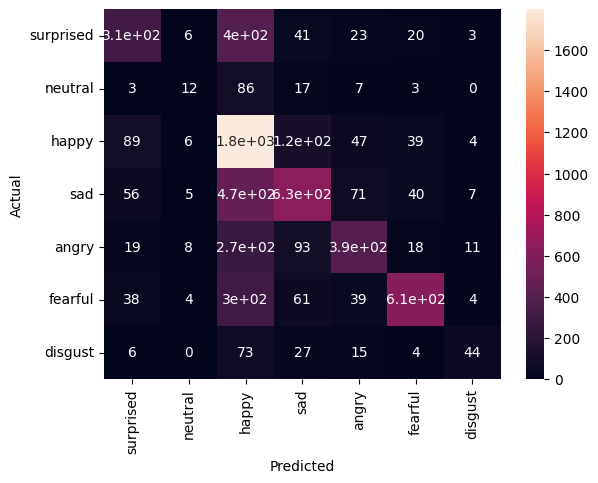

In [62]:
cm = pd.DataFrame(confusion_matrix(y_lin_val, y_lin_pred), index=emotions_dict.values(), columns=emotions_dict.values())
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [63]:
accuracy_score(y_lin_val, y_lin_pred)

0.5991800693787449

## Linear Model

In [64]:
class EmotionDataset(Dataset):
    def __init__(self, data, labels=None):
        # labels none for test data that doesn't have labels
        self.data = data.toarray().astype(np.float32)
        self.labels = labels.to_numpy() if labels is not None else np.zeros(data.shape[0])


    def __len__(self):
        return self.data.shape[0]


    def __getitem__(self, index):
        return self.data[index], self.labels[index]

In [65]:
train_lin_ds = EmotionDataset(X_lin_train, y_lin_train)
train_lin_loader = DataLoader(train_lin_ds, batch_size=16, shuffle=True)

val_lin_ds = EmotionDataset(X_lin_val, y_lin_val)
val_lin_loader = DataLoader(val_lin_ds, batch_size=16, shuffle=False)

In [66]:
for x in train_lin_loader:
    print(x[0].shape)
    break

torch.Size([16, 8301])


In [67]:
class SimpleLinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleLinearModel, self).__init__()

        self.linear1 = nn.Linear(input_size, 128)
        self.linear2 = nn.Linear(128, 64)
        self.dropout1 = nn.Dropout(0.5)
        self.linear3 = nn.Linear(64, output_size)


    def forward(self, inputs):
        # we assume the inputs already in embedding dimension
        output = F.relu(self.linear1(inputs))
        output = F.relu(self.linear2(output))
        output = self.dropout1(output)
        output = F.softmax(self.linear3(output), dim=1)

        return output

In [68]:
linear_model = SimpleLinearModel(input_size=X_lin_train.shape[1], output_size=len(emotions_dict)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(linear_model.parameters(), lr=0.001, weight_decay=1e-5)

In [69]:
EPOCHS = 20

In [70]:
def fit(model, criterion, optimizer, train_loader, val_loader, epochs=EPOCHS):
    train_accuracies = []
    val_accuracies = []
    train_losses = []
    val_losses = []

    for epoch in range(epochs):  # Loop over the dataset multiple times
        running_loss = 0.0
        total = 0
        correct = 0
        model.train()
        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
    
            optimizer.zero_grad()
    
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    
            running_loss += loss.item() 

            _, predicted = torch.max(outputs.data, axis=1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
        # get train loss and accuracy
        train_loss = running_loss / len(train_loader.dataset)
        train_accuracy = correct / total
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
    
        # get test loss and accuracy
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            model.eval()
            for data in val_loader:
                inputs, labels = data
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, axis=1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss /= len(val_loader)
        val_accuracy = val_correct / val_total
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch}: train_loss: {train_loss:.4f}; train_accuracy: {train_accuracy:.4f}; val_loss: {val_loss:.4f}; val_accuracy: {val_accuracy:.4f}")

    return {
        "train_loss": train_losses,
        "train_accuracy": train_accuracies,
        "val_loss": val_losses,
        "val_accuracy": val_accuracies
    }

In [71]:
clear_device_cache()

In [72]:
linear_model_result = fit(linear_model, criterion, optimizer, train_lin_loader, val_lin_loader, epochs=EPOCHS)

Epoch 0: train_loss: 0.1055; train_accuracy: 0.4742; val_loss: 1.5723; val_accuracy: 0.5907
Epoch 1: train_loss: 0.0994; train_accuracy: 0.5692; val_loss: 1.5745; val_accuracy: 0.5837
Epoch 2: train_loss: 0.0981; train_accuracy: 0.5894; val_loss: 1.5693; val_accuracy: 0.5904
Epoch 3: train_loss: 0.0972; train_accuracy: 0.6022; val_loss: 1.5660; val_accuracy: 0.5946
Epoch 4: train_loss: 0.0967; train_accuracy: 0.6099; val_loss: 1.5669; val_accuracy: 0.5924
Epoch 5: train_loss: 0.0963; train_accuracy: 0.6170; val_loss: 1.5674; val_accuracy: 0.5935
Epoch 6: train_loss: 0.0960; train_accuracy: 0.6224; val_loss: 1.5733; val_accuracy: 0.5881
Epoch 7: train_loss: 0.0956; train_accuracy: 0.6289; val_loss: 1.5687; val_accuracy: 0.5915
Epoch 8: train_loss: 0.0953; train_accuracy: 0.6326; val_loss: 1.5618; val_accuracy: 0.6008
Epoch 9: train_loss: 0.0949; train_accuracy: 0.6402; val_loss: 1.5689; val_accuracy: 0.5926
Epoch 10: train_loss: 0.0947; train_accuracy: 0.6420; val_loss: 1.5661; val_accu

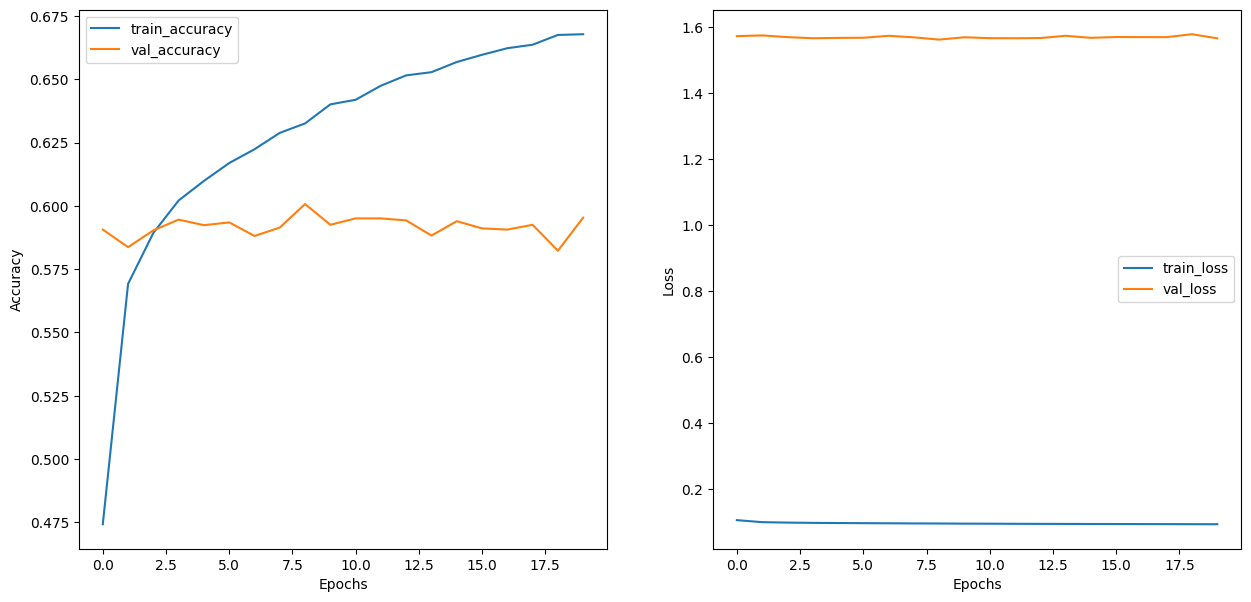

In [73]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)

plt.plot(linear_model_result["train_accuracy"], label="train_accuracy")
plt.plot(linear_model_result["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(linear_model_result["train_loss"], label="train_loss")
plt.plot(linear_model_result["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [74]:
import datetime
PATH = f"models/torch_text_linear_model_{datetime.datetime.now().strftime('%Y.%m.%d.%H.%M.%S')}.pth"
print(PATH)

# save model
torch.save(linear_model.state_dict(), PATH)

# load model, UNCOMMENT this so no need to train again
# model = torch.load(PATH)

models/torch_text_linear_model_2024.06.14.17.02.54.pth


## Recurrent Model
start with the dataset first

In [75]:
from collections import Counter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchtext/utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)


In [76]:
selected_column = "Clean_Text"

In [77]:
# from clean text column, convert to vocab id
counts = Counter()
for row in df["Clean_Text"]:
    counts.update(row)

# deleting infrequent words
MIN_COUNT = 2

print("num_words before:",len(counts.keys()))
for word in list(counts):
    if counts[word] < MIN_COUNT:
        del counts[word]
print("num_words after:",len(counts.keys()))

num_words before: 45272
num_words after: 17720


In [78]:
vocab2index = {"": 0, "UNK": 1}
words = ["", "UNK"]
for word in counts:
    vocab2index[word] = len(words)
    words.append(word)

In [79]:
def encode_sentence(text, vocab2index, max_len=128):
    encoded = np.zeros(max_len, dtype=int)
    enc1 = np.array([vocab2index.get(word, vocab2index["UNK"]) for word in text])
    length = min(max_len, len(enc1)) # if above max len, cut the rest
    encoded[:length] = enc1[:length]

    return encoded

In [80]:
df["Clean_Text_Encoded"] = df["Clean_Text"].progress_apply(lambda x: np.array(encode_sentence(x, vocab2index)))
df.head()

  0%|          | 0/31707 [00:00<?, ?it/s]

/var/folders/d_/43yhfw3n2wx5mg7dg0cxjld00000gn/T/ipykernel_70458/1032533658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Clean_Text_Encoded"] = df["Clean_Text"].progress_apply(lambda x: np.array(encode_sentence(x, vocab2index)))


,Text,Emotion_uniform,Clean_Text,Clean_Text_detok,Clean_Text_Encoded
1,Sage Act upgrade on my to do list for tommorow.,2,"[Sage, Act, upgrade, list, tommorow]",Sage Act upgrade list tommorow,"[1, 2, 3, 4, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,3,"[ON, THE, WAY, TO, MY, HOMEGIRL, BABY, FUNERAL...",ON THE WAY TO MY HOMEGIRL BABY FUNERAL MAN I H...,"[6, 7, 8, 9, 10, 1, 11, 1, 12, 13, 14, 1, 15, ..."
3,Such an eye ! The true hazel eye-and so brill...,2,"[Such, eye, The, true, hazel, eyeand, brillian...",Such eye The true hazel eyeand brilliant Regul...,"[20, 21, 22, 23, 1, 1, 24, 1, 25, 26, 27, 1, 2..."
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,2,"[Iluvmiasantos, ugh, babe, hugggzzz, u, babe, ...",Iluvmiasantos ugh babe hugggzzz u babe naamaze...,"[1, 54, 55, 1, 56, 55, 1, 57, 58, 59, 55, 59, ..."
5,I'm expecting an extremely important phonecall...,5,"[Im, expecting, extremely, important, phonecal...",Im expecting extremely important phonecall min...,"[65, 66, 67, 68, 69, 70, 71, 72, 0, 0, 0, 0, 0..."


In [81]:
X_train, X_val, y_train, y_val = train_test_split(df["Clean_Text_Encoded"], y, random_state=3407, test_size=0.2, stratify=y)

In [82]:
class TextEmotionDataset(Dataset):
    def __init__(self, data, labels=None):
        self.texts = data.to_numpy() # the assumption is already vocab id
        self.labels = labels.to_list()

    
    def __len__(self):
        return len(self.texts)


    def __getitem__(self, index):
        text = self.texts[index]
        label = torch.tensor(self.labels[index], dtype=torch.long)
        return text, label

In [83]:
train_ds = TextEmotionDataset(X_train, y_train)
train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)

val_ds = TextEmotionDataset(X_val, y_val)
val_loader = DataLoader(val_ds, batch_size=16, shuffle=False)

In [84]:
vocab_size = len(counts.keys())
vocab_size

17720

In [85]:
for x in val_loader:
    print(x[0].shape)
    break

torch.Size([16, 128])


In [94]:
class RecurrentModel(nn.Module):
    def __init__(self, vocab_size, output_size):
        super(RecurrentModel, self).__init__()

        self.vocab_size = vocab_size

        self.embedding = nn.Embedding(vocab_size, embedding_dim=128)
        self.lstm = nn.LSTM(128, hidden_size=64, num_layers=2, bidirectional=False, dropout=0.1)

        self.linear1 = nn.Linear(64, 64)
        self.dropout1 = nn.Dropout(0.2)
        self.linear2 = nn.Linear(64, output_size)


    def forward(self, input_text):
        embedding_output = self.embedding(input_text)

        lstm_output, (hidden_state, cell_state) = self.lstm(embedding_output)

        output = F.relu(self.linear1(lstm_output[:, -1]))
        output = self.dropout1(output)
        output = self.linear2(output)

        return output

In [95]:
rnn_model = RecurrentModel(vocab_size, output_size=len(emotions_dict)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(rnn_model.parameters(), lr=0.1)

In [96]:
rnn_model_result = fit(rnn_model, criterion, optimizer, train_loader, val_loader, epochs=EPOCHS)

Epoch 0: train_loss: 0.1067; train_accuracy: 0.3289; val_loss: 1.6931; val_accuracy: 0.3311
Epoch 1: train_loss: 0.1062; train_accuracy: 0.3294; val_loss: 1.6913; val_accuracy: 0.3311
Epoch 2: train_loss: 0.1064; train_accuracy: 0.3296; val_loss: 1.6958; val_accuracy: 0.3311
Epoch 3: train_loss: 0.1063; train_accuracy: 0.3272; val_loss: 1.6911; val_accuracy: 0.3311
Epoch 4: train_loss: 0.1063; train_accuracy: 0.3298; val_loss: 1.6884; val_accuracy: 0.3311
Epoch 5: train_loss: 0.1063; train_accuracy: 0.3273; val_loss: 1.6998; val_accuracy: 0.3311
Epoch 6: train_loss: 0.1063; train_accuracy: 0.3266; val_loss: 1.6920; val_accuracy: 0.3311
Epoch 7: train_loss: 0.1064; train_accuracy: 0.3279; val_loss: 1.7275; val_accuracy: 0.3311
Epoch 8: train_loss: 0.1063; train_accuracy: 0.3290; val_loss: 1.7106; val_accuracy: 0.3311
Epoch 9: train_loss: 0.1064; train_accuracy: 0.3296; val_loss: 1.6999; val_accuracy: 0.3311
Epoch 10: train_loss: 0.1063; train_accuracy: 0.3262; val_loss: 1.7024; val_accu

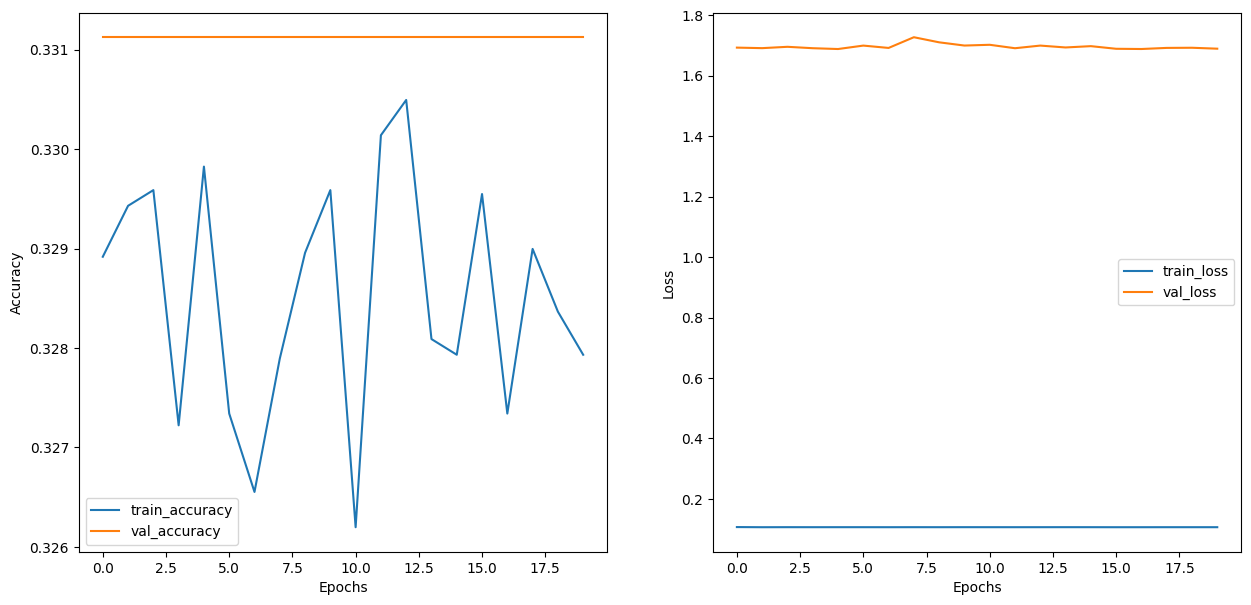

In [97]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)

plt.plot(rnn_model_result["train_accuracy"], label="train_accuracy")
plt.plot(rnn_model_result["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(rnn_model_result["train_loss"], label="train_loss")
plt.plot(rnn_model_result["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [98]:
PATH = f"models/torch_text_rnn_model_{datetime.datetime.now().strftime('%Y.%m.%d.%H.%M.%S')}.pth"
print(PATH)

# save model
torch.save(rnn_model.state_dict(), PATH)

models/torch_text_rnn_model_2024.06.14.17.11.01.pth


## Convolutional Model

In [99]:
for x in train_loader:
    print(x[0].shape)
    break

torch.Size([16, 128])


In [118]:
class ConvolutionalModel(nn.Module):
    def __init__(self, vocab_size, output_size):
        super(ConvolutionalModel, self).__init__()

        self.vocab_size = vocab_size

        self.embedding = nn.Embedding(vocab_size, embedding_dim=128, padding_idx=1)
        self.conv1 = nn.Conv1d(128, 64, 3)
        self.conv2 = nn.Conv1d(64, 32, 3)
        self.dropout1 = nn.Dropout(0.1)
        self.linear_size = 32 * 124
        self.linear1 = nn.Linear(self.linear_size, 64)
        self.dropout2 = nn.Dropout(0.1)
        self.linear2 = nn.Linear(64, output_size)

    
    def forward(self, input_text):
        embedded = self.embedding(input_text)
        # embedded = [batch size, seq len, embedding dim]
        # need to convert to:
        # embedded = [batch size, embedding dim, seq len]
        embedded = embedded.permute(0, 2, 1)
        output = F.relu(self.conv1(embedded))
        output = F.relu(self.conv2(output))
        output = self.dropout1(output).view(-1, self.linear_size)
        output = F.relu(self.linear1(output))
        output = self.dropout2(output)
        output = self.linear2(output) # no need softmax

        return output

In [119]:
cnn_model = ConvolutionalModel(vocab_size, output_size=len(emotions_dict)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001, weight_decay=1e-5)

In [120]:
cnn_model_result = fit(cnn_model, criterion, optimizer, train_loader, val_loader, epochs=EPOCHS)

Epoch 0: train_loss: 0.0975; train_accuracy: 0.3844; val_loss: 1.3735; val_accuracy: 0.4735
Epoch 1: train_loss: 0.0773; train_accuracy: 0.5418; val_loss: 1.1974; val_accuracy: 0.5651
Epoch 2: train_loss: 0.0624; train_accuracy: 0.6465; val_loss: 1.1582; val_accuracy: 0.5891
Epoch 3: train_loss: 0.0508; train_accuracy: 0.7135; val_loss: 1.2017; val_accuracy: 0.5922
Epoch 4: train_loss: 0.0410; train_accuracy: 0.7694; val_loss: 1.2819; val_accuracy: 0.5889
Epoch 5: train_loss: 0.0327; train_accuracy: 0.8168; val_loss: 1.5177; val_accuracy: 0.5834
Epoch 6: train_loss: 0.0260; train_accuracy: 0.8539; val_loss: 1.7314; val_accuracy: 0.5948
Epoch 7: train_loss: 0.0205; train_accuracy: 0.8861; val_loss: 2.0613; val_accuracy: 0.5833
Epoch 8: train_loss: 0.0176; train_accuracy: 0.9040; val_loss: 2.0745; val_accuracy: 0.5801
Epoch 9: train_loss: 0.0145; train_accuracy: 0.9214; val_loss: 2.3666; val_accuracy: 0.5743
Epoch 10: train_loss: 0.0126; train_accuracy: 0.9336; val_loss: 2.5731; val_accu

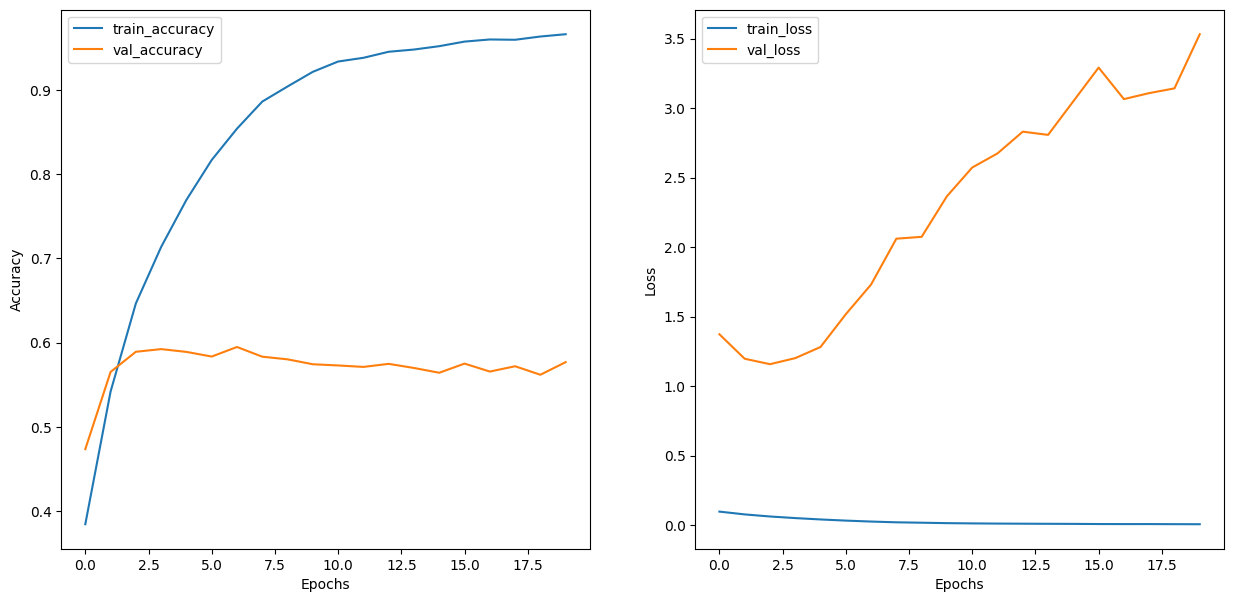

In [121]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)

plt.plot(cnn_model_result["train_accuracy"], label="train_accuracy")
plt.plot(cnn_model_result["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_model_result["train_loss"], label="train_loss")
plt.plot(cnn_model_result["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [122]:
PATH = f"models/torch_text_cnn_model_{datetime.datetime.now().strftime('%Y.%m.%d.%H.%M.%S')}.pth"
print(PATH)

# save model
torch.save(cnn_model.state_dict(), PATH)

models/torch_text_cnn_model_2024.06.14.17.16.24.pth


# Predict

In [123]:
def predict_linear(model, text, label=None):
    # a use of linear model
    print(text)
    text_embedding = vectorizer.transform([text]).toarray().astype(np.float32)

    with torch.no_grad():
        model.eval()
        outputs = model(torch.tensor(text_embedding).to(device))
        _, predicted = torch.max(outputs.data, axis=1)
    
        predicted = predicted.cpu().numpy()

    print("Detected Emotion:", emotions_dict[predicted[0]])
    if label is not None:
        print("Actual Emotion  :", emotions_dict[label])

In [124]:
predict_linear(linear_model, "I hate this country")

I hate this country
Detected Emotion: disgust


In [125]:
val_data_test = np.random.choice(y_val.index)
test_sample = df.loc[val_data_test]
test_sample

Text                   I hope so . I'm looking for some material for...
Emotion_uniform                                                       1
Clean_Text            [I, hope, Im, looking, material, paper, Im, wr...
Clean_Text_detok      I hope Im looking material paper Im writing Im...
Clean_Text_Encoded    [13, 131, 65, 1796, 6806, 510, 65, 1954, 65, 1...
Name: 25219, dtype: object

In [126]:
predict_linear(linear_model, test_sample["Clean_Text_detok"], test_sample["Emotion_uniform"])

I hope Im looking material paper Im writing Im quite sure look
Detected Emotion: happy
Actual Emotion  : neutral


In [127]:
def predict_nonlin(model, text, label=None):
    # use rnn model
    # convert to vocab id
    print(text)
    text_encoded = encode_sentence(text, vocab2index)
    text_encoded = text_encoded.reshape(-1, text_encoded.shape[0])

    with torch.no_grad():
        model.eval()
        output = model(torch.tensor(text_encoded).to(device))
        _, predicted = torch.max(output.data, axis=1)

        predicted = predicted.cpu().numpy()

    print("Detected Emotion:", emotions_dict[predicted[0]])
    if label is not None:
        print("Actual Emotion  :", emotions_dict[label])

In [128]:
predict_nonlin(cnn_model, "I hate this country")

I hate this country
Detected Emotion: happy


In [129]:
predict_nonlin(cnn_model, test_sample["Text"], test_sample["Emotion_uniform"])

 I hope so . I'm looking for some material for a paper I'm writing , and I'm not quite sure where to look . 
Detected Emotion: happy
Actual Emotion  : neutral


# Confusion Matrix

In [130]:
def conf_matrix(model, val_loader):
    pred = []
    labs = []
    with torch.no_grad():
        model.eval()
        for data in val_loader:
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, predicted = torch.max(outputs.data, axis=1)
            labs.extend(labels.cpu().numpy())
            pred.extend(predicted.cpu().numpy())

    accuracy = accuracy_score(labs, pred)
    conf_mat = confusion_matrix(labs, pred)
    print("Accuracy:", accuracy)
    cm = pd.DataFrame(conf_mat, index=emotions_dict.values(), columns=emotions_dict.values())
    sns.heatmap(cm, annot=True)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Accuracy: 0.5953957742037213


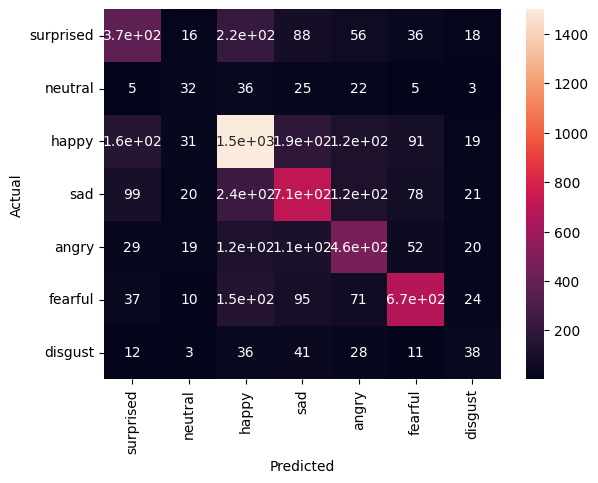

In [131]:
conf_matrix(linear_model, val_lin_loader)

Accuracy: 0.33112582781456956


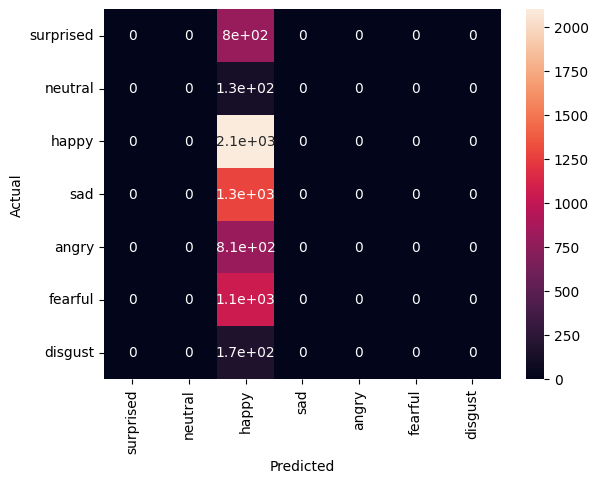

In [132]:
conf_matrix(rnn_model, val_loader)

Accuracy: 0.5767896562598549


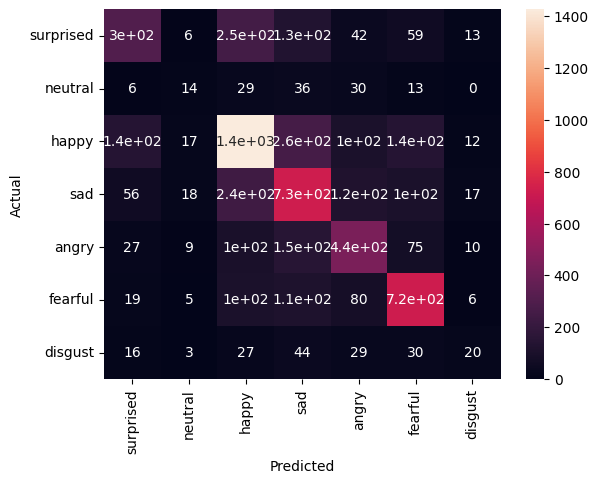

In [133]:
conf_matrix(cnn_model, val_loader)